### Libraries 

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

connection = sqlite3.connect('../data/wow.db')

df_wowtoken = pd.read_sql_query("SELECT * FROM wowtoken WHERE date!=''", connection)
df_currency = pd.read_sql_query("SELECT * FROM currency WHERE date!=''", connection)

connection.close()

Removing unuseful columns

In [2]:
df_wowtoken = df_wowtoken.drop(["id", "index"], axis=1)
df_currency = df_currency.drop(["id",'index'], axis=1)

### Raw currency dataframe

In [3]:
df_currency.head()

,date,time,Usd,Eur,Cny,Krw,Brl
0,03/27/2019,14:40:02,1,0.885661146,6.7149056771,1134.4522185812,None
1,03/27/2019,15:00:01,1,0.885661146,6.7149056771,1134.4522185812,None
2,03/27/2019,15:20:02,1,0.8880206021,6.7248912175,1137.5543912619,None
3,03/27/2019,15:40:02,1,0.8880206021,6.7248912175,1137.5543912619,None
4,03/27/2019,16:00:02,1,0.8880206021,6.7248912175,1137.5543912619,None


### Raw wowtoken dataframe

In [4]:
df_wowtoken.head()

,date,time,Us,Eu,Ch,Kr,Tw
0,03/02/2019,14:00:01,"111,249","159,930","184,765","242,896","263,267"
1,03/02/2019,14:20:01,"111,076","160,582","185,593","245,325","263,694"
2,03/02/2019,14:40:01,"111,096","160,815","186,028","247,778","263,088"
3,03/02/2019,15:00:01,"111,199","160,434","186,136","249,695","262,637"
4,03/02/2019,15:20:01,"111,234","160,014","186,335","250,066","262,494"


## Cleaning wowtoken dataframe

Replacing , with .

In [5]:
df_wowtoken["Us"] = df_wowtoken["Us"].str.replace(",", ".")
df_wowtoken["Eu"] = df_wowtoken["Eu"].str.replace(",", ".")
df_wowtoken["Ch"] = df_wowtoken["Ch"].str.replace(",", ".")
df_wowtoken["Kr"] = df_wowtoken["Kr"].str.replace(",", ".")
df_wowtoken["Tw"] = df_wowtoken["Tw"].str.replace(",", ".")

Converting from str to np.float64

In [6]:
df_wowtoken['Us'] = pd.to_numeric(df_wowtoken["Us"])
df_wowtoken['Eu'] = pd.to_numeric(df_wowtoken["Eu"])
df_wowtoken['Ch'] = pd.to_numeric(df_wowtoken["Ch"])
df_wowtoken['Kr'] = pd.to_numeric(df_wowtoken["Kr"])
df_wowtoken['Tw'] = pd.to_numeric(df_wowtoken["Tw"])

Converting date and time column to one column

In [7]:
s1 = (df_wowtoken['date']+' - '+df_wowtoken['time'])

#altering format
s1 = pd.to_datetime(s1, infer_datetime_format=True) 

#removing columns
df_wowtoken = df_wowtoken.drop(['date', 'time'], axis=1)

# add new column
df_wowtoken['date'] = s1

#reordering colmuns
df_wowtoken = df_wowtoken[['date','Us', 'Eu', 'Ch', 'Kr', 'Tw']]

## Cleaning currency dataframe

Filling NULL values in Brl Column

In [8]:
# Copying the last value
s1 = df_currency['Brl']
# there is no data frmo 0 to 234
# so I copy the last values
s1[0:235] = s1[235]
df_currency['Brl'] = s1

Converting from str to np.float64

In [9]:
df_currency['Usd'] = pd.to_numeric(df_currency['Usd'])
df_currency['Eur'] = pd.to_numeric(df_currency['Eur'])
df_currency['Cny'] = pd.to_numeric(df_currency['Cny'])
df_currency['Krw'] = pd.to_numeric(df_currency['Krw'])
df_currency['Brl'] = pd.to_numeric(df_currency['Brl'])

Converting date and time column to one column

In [10]:
s1 = (df_currency['date']+' - '+df_currency['time'])

#altering format
s1 = pd.to_datetime(s1, infer_datetime_format=True) 

#removing columns
df_currency = df_currency.drop(['date', 'time'], axis=1)

# add new column
df_currency['date'] = s1

#reordering colmuns
df_currency = df_currency[['date','Usd', 'Eur', 'Cny', 'Krw', 'Brl']]

### Putting wowtoken at the same level of rows

In [11]:
diff = df_currency['date'][0] - df_wowtoken['date'][0]
            # 72 rows / day + 3 rows/ hour
registers = diff.days*72 + (int)(diff.seconds/60/20)
df_wowtoken = df_wowtoken[registers-1:]

# Reset index and drop new column
df_wowtoken.reset_index(inplace=True)
df_wowtoken.drop('index', axis=1, inplace=True)

Filling NA values with method scalar

In [12]:
df_wowtoken = df_wowtoken.fillna(method='pad',axis=0)
df_wowtoken[df_wowtoken.isna().any(axis=1)]

,date,Us,Eu,Ch,Kr,Tw


Summary

In [13]:
print('\t Wowtoken')
print('start:',df_wowtoken['date'][0])
print('end:  ',df_wowtoken['date'][df_wowtoken['date'].size-1])
print('len:  ',df_wowtoken['date'].size)
print('days: ',(int)(df_wowtoken['date'].size/72))
print('hours:',(int)(df_wowtoken['date'].size%72*20/60))
print('min:  ',df_wowtoken['date'].size%72*20%60)

print('\n\t Currency')
print('start:',df_currency['date'][0])
print('end:  ',df_currency['date'][df_currency['date'].size-1])
print('len:  ',df_currency['date'].size)
print('days: ',(int)(df_currency['date'].size/72))
print('hours:',(int)(df_currency['date'].size%72*20/60))
print('min:  ',df_currency['date'].size%72*20%60)

	 Wowtoken
start: 2019-03-27 16:20:02
end:   2020-07-27 18:00:01
len:   34938
days:  485
hours: 6
min:   0

	 Currency
start: 2019-03-27 14:40:02
end:   2020-07-27 18:00:03
len:   34938
days:  485
hours: 6
min:   0


## Sorting diary

## Wowtoken plotting and analysing

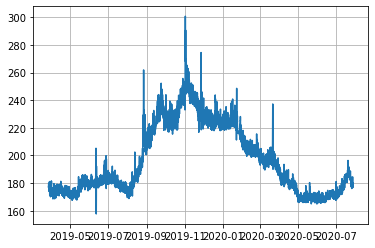

,date,Us,Eu,Ch,Kr,Tw
0,2019-03-27 16:20:02,119.502,177.184,189.161,245.010,268.999
1,2019-03-27 16:40:02,119.374,176.847,188.594,242.577,267.811
2,2019-03-27 17:00:01,119.307,176.893,188.267,240.151,267.006
3,2019-03-27 17:20:01,119.054,176.819,188.023,237.749,265.981
4,2019-03-27 17:40:01,118.718,176.819,187.576,235.372,265.403
...,...,...,...,...,...,...
34933,2020-07-27 16:40:01,120.588,178.665,377.797,207.277,232.029
34934,2020-07-27 17:00:01,120.759,178.118,380.415,206.931,230.654
34935,2020-07-27 17:20:01,121.072,177.635,381.321,206.137,229.268
34936,2020-07-27 17:40:02,121.333,177.227,381.375,205.551,228.765


In [14]:
plt.plot(df_wowtoken['date'], df_wowtoken['Eu'])
plt.grid(True)
plt.show()
df_wowtoken

## Currency plotting and analysing

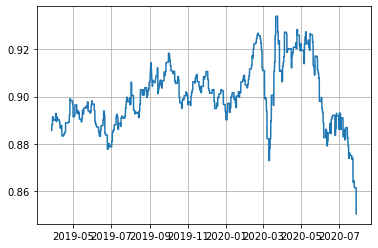

,date,Usd,Eur,Cny,Krw,Brl
0,2019-03-27 14:40:02,1.0,0.885661,6.714906,1134.452219,3.904317
1,2019-03-27 15:00:01,1.0,0.885661,6.714906,1134.452219,3.904317
2,2019-03-27 15:20:02,1.0,0.888021,6.724891,1137.554391,3.904317
3,2019-03-27 15:40:02,1.0,0.888021,6.724891,1137.554391,3.904317
4,2019-03-27 16:00:02,1.0,0.888021,6.724891,1137.554391,3.904317
...,...,...,...,...,...,...
34933,2020-07-27 16:40:04,1.0,0.850340,7.002041,1196.556122,5.180187
34934,2020-07-27 17:00:03,1.0,0.850340,7.002041,1196.556122,5.180187
34935,2020-07-27 17:20:04,1.0,0.850340,7.002041,1196.556122,5.180187
34936,2020-07-27 17:40:05,1.0,0.850340,7.002041,1196.556122,5.180187


In [15]:
plt.plot(df_currency['date'], df_currency['Eur'])
plt.grid(True)
plt.show()
df_currency

In [16]:
df_wowtoken.to_csv('df_wowtoken.csv')
df_currency.to_csv('df_currency.csv')